In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Connect to your database
# Change 'your_database.db' to your actual file name
conn = sqlite3.connect('/content/email_marketing.db')

/tmp/ipython-input-4104999114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='device_type', y='Total_Unsub', palette='viridis')


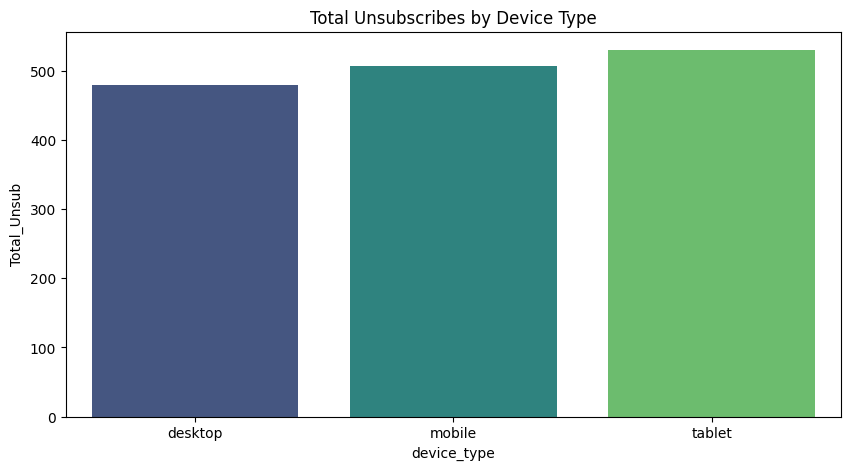

In [3]:
# --- VISUAL 1: Unsubscribes by Device Type ---
query1 = """
SELECT COUNT(cp.total_unsubscribes) AS Total_Unsub, u.device_type
FROM Campaign_Performance cp
JOIN Unsubscribes un ON un.campaign_id = cp.campaign_id
JOIN Users u ON u.user_id = un.user_id
GROUP BY u.device_type;
"""
df1 = pd.read_sql_query(query1, conn)
plt.figure(figsize=(10, 5))
sns.barplot(data=df1, x='device_type', y='Total_Unsub', palette='viridis')
plt.title('Total Unsubscribes by Device Type')
plt.show()

/tmp/ipython-input-952536073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='region', y='Total_Unsub', palette='magma')


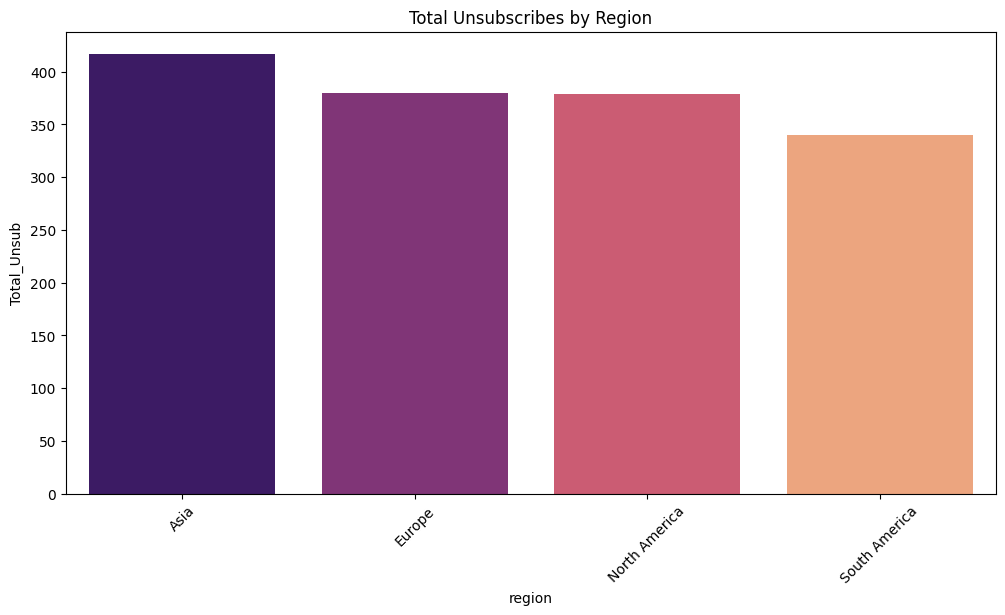

In [4]:
# --- VISUAL 2: Unsubscribes by Region ---
query2 = """
SELECT COUNT(cp.total_unsubscribes) AS Total_Unsub, u.region
FROM Campaign_Performance cp
JOIN Unsubscribes un ON un.campaign_id = cp.campaign_id
JOIN Users u ON u.user_id = un.user_id
GROUP BY u.region;
"""
df2 = pd.read_sql_query(query2, conn)
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='region', y='Total_Unsub', palette='magma')
plt.xticks(rotation=45)
plt.title('Total Unsubscribes by Region')
plt.show()

/tmp/ipython-input-1752816848.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, y='reason', order=df3['reason'].value_counts().index, palette='coolwarm')


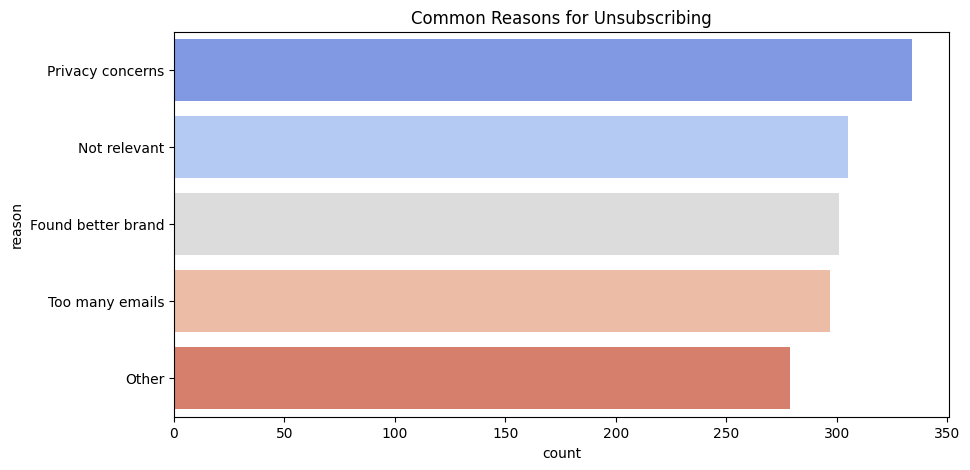

In [5]:
# --- VISUAL 3: Unsubscribe Reasons (Campaign Breakdown) ---
query3 = """
SELECT c.campaign_name, un.reason
FROM Campaigns c
JOIN Unsubscribes un ON un.campaign_id = c.campaign_id
"""
df3 = pd.read_sql_query(query3, conn)
plt.figure(figsize=(10, 5))
sns.countplot(data=df3, y='reason', order=df3['reason'].value_counts().index, palette='coolwarm')
plt.title('Common Reasons for Unsubscribing')
plt.show()

/tmp/ipython-input-3170389750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x='Avg_Unsubscribe_Rate', y='category', palette='rocket')


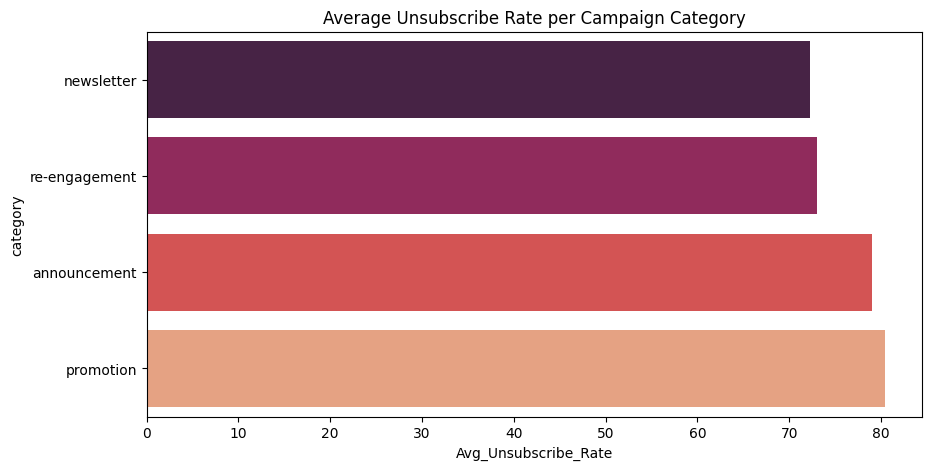

In [6]:
# --- VISUAL 4: Avg Unsubscribe Rate by Category ---
query4 = """
SELECT c.category, AVG(cp.total_unsubscribes) AS Avg_Unsubscribe_Rate
FROM Campaigns c
JOIN Campaign_Performance cp ON c.campaign_id = cp.campaign_id
GROUP BY c.category
ORDER BY Avg_Unsubscribe_Rate;
"""
df4 = pd.read_sql_query(query4, conn)
plt.figure(figsize=(10, 5))
sns.barplot(data=df4, x='Avg_Unsubscribe_Rate', y='category', palette='rocket')
plt.title('Average Unsubscribe Rate per Campaign Category')
plt.show()

In [7]:
# Close the connection
conn.close()